<a href="https://colab.research.google.com/github/bhavangond/TensorFlow/blob/main/ColourVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from cv2 import dnn
from google.colab.patches import cv2_imshow


In [ ]:
import os
import gdown
!wget https://raw.githubusercontent.com/richzhang/colorization/refs/heads/caffe/colorization/models/colorization_deploy_v2.prototxt


model_file = "colorization_release_v2.caffemodel"

# Download the model if it doesn't exist
if not os.path.exists(model_file):
    url = "https://drive.google.com/uc?export=download&id=1DOkZ5LCUdI-6_Q77lu7z5OOqRwqYJLnA"
    gdown.download(url, model_file, quiet=False)

hull_pts= 'pts_in_hull.npy'


# Download the model if it doesn't exist
if not os.path.exists(hull_pts):
    url = "https://drive.google.com/uc?export=download&id=1L6iobt3tuJi-o_YvWHRPUkDvkkNTZEo5"
    gdown.download(url, hull_pts, quiet=False)


img_path = 'test.jpg'
if not os.path.exists(img_path):
    url = "https://drive.google.com/uc?export=download&id=1Ozl--vy_m4vZ5zkUhhqiO86d9rNqnDNe"
    gdown.download(url, img_path, quiet=False)

--2025-10-21 11:34:50--  https://raw.githubusercontent.com/richzhang/colorization/refs/heads/caffe/colorization/models/colorization_deploy_v2.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945 (9.7K) [text/plain]
Saving to: ‘colorization_deploy_v2.prototxt’

colorization_deploy 100%[===================>]   9.71K  --.-KB/s    in 0s      

2025-10-21 11:34:50 (21.4 MB/s) - ‘colorization_deploy_v2.prototxt’ saved [9945/9945]



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1DOkZ5LCUdI-6_Q77lu7z5OOqRwqYJLnA
From (redirected): https://drive.google.com/uc?export=download&id=1DOkZ5LCUdI-6_Q77lu7z5OOqRwqYJLnA&confirm=t&uuid=9a604ef5-0e45-4bc5-a05a-2147a9adc462
To: /content/colorization_release_v2.caffemodel
100%|██████████| 129M/129M [00:02<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1L6iobt3tuJi-o_YvWHRPUkDvkkNTZEo5
To: /content/pts_in_hull.npy
100%|██████████| 5.09k/5.09k [00:00<00:00, 4.06MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Ozl--vy_m4vZ5zkUhhqiO86d9rNqnDNe
To: /content/test.jpg
100%|██████████| 695k/695k [00:00<00:00, 9.34MB/s]


In [ ]:
proto_file = 'colorization_deploy_v2.prototxt'
model_file = 'colorization_release_v2.caffemodel'
hull_pts = 'pts_in_hull.npy'
img_path = 'test.jpg'

In [ ]:
net = dnn.readNetFromCaffe(proto_file, model_file)
kernel = np.load(hull_pts)


In [ ]:
img = cv2.imread(img_path)
scaled = img.astype("float32") / 255.0
lab_img = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)


In [ ]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = kernel.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]


In [ ]:
resized = cv2.resize(lab_img, (224, 224))
L = cv2.split(resized)[0]
L -= 50


In [ ]:
net.setInput(cv2.dnn.blobFromImage(L))
ab_channel = net.forward()[0, :, :, :].transpose((1, 2, 0))


In [ ]:
ab_channel = cv2.resize(ab_channel, (img.shape[1], img.shape[0]))


In [ ]:
L = cv2.split(lab_img)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab_channel), axis=2)


In [ ]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")


In [ ]:
img = cv2.resize(img, (640, 640))
colorized = cv2.resize(colorized, (640, 640))
result = cv2.hconcat([img, colorized])



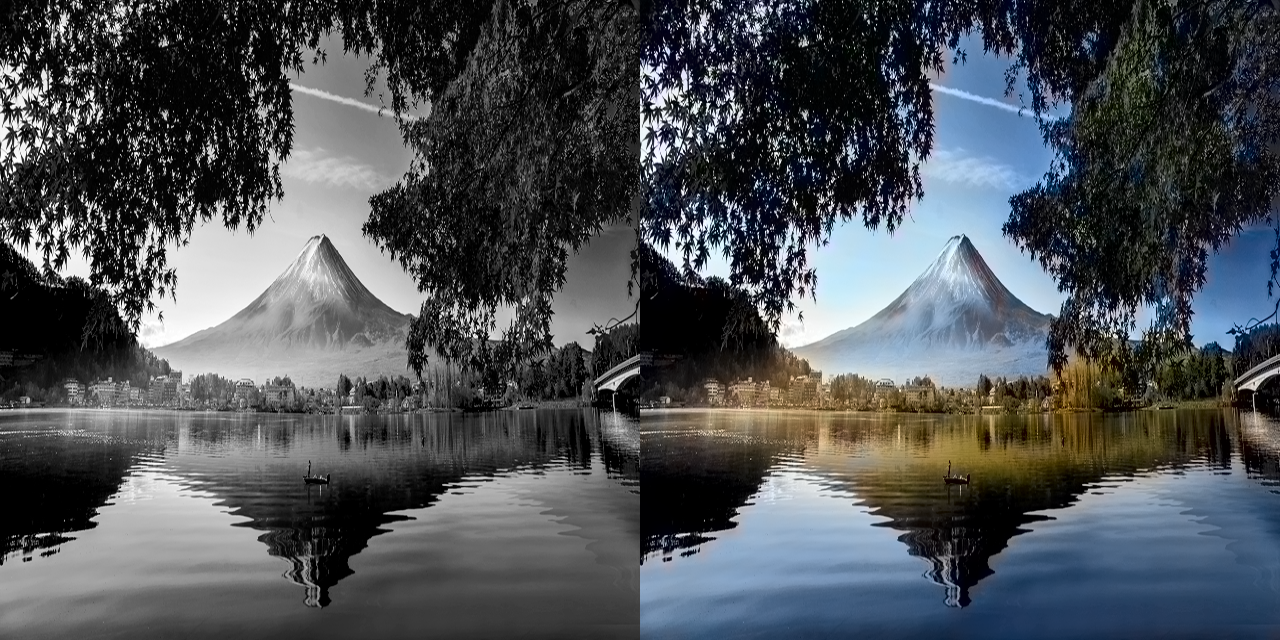

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(result)
